In [104]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

import skimage
from skimage.util import random_noise 

from scipy.ndimage import rotate
import cv2 
import random 
import os

import torch
from torch import tensor
import torch.nn as nn
relu = nn.functional.relu
softmax = nn.functional.softmax
from torch.nn.functional import cross_entropy
from pathlib import Path
import os, shutil
from os import listdir
import pickle

<class 'numpy.ndarray'>
(1000, 1500, 3)
(900, 1400, 3)


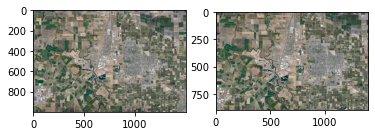

In [174]:
im = Image.open(r"C:\Users\g_bab\Downloads\square landscape.jpg")
#just make the image we send in a square and we'll figure out what dims to break the smaller things into
im = np.array(im)
im_small = im[50:-50, 50:-50]       #will use this when adding bits and pieces to the images x and y, assuming 25 is the amount we are shifting along x or y - prevents out of bounds
print(type(im))
print(im.shape)
print(im_small.shape)
fig, ax = plt.subplots(1,2)
ax[0].imshow(im)
ax[1].imshow(im_small)

In [175]:
#zoom 
def clipped_zoom(img, zoom_factor=0):

    """
    Center zoom in/out of the given image and returning an enlarged/shrinked view of 
    the image without changing dimensions
    ------
    Args:
        img : ndarray
            Image array
        zoom_factor : float
            amount of zoom as a ratio [0 to Inf). Default 0.
    ------
    Returns:
        result: ndarray
           numpy ndarray of the same shape of the input img zoomed by the specified factor.          
    """
    if zoom_factor == 0:
        return img


    height, width = img.shape[:2] # It's also the final desired shape
    new_height, new_width = int(height * zoom_factor), int(width * zoom_factor)
    
    ### Crop only the part that will remain in the result (more efficient)
    # Centered bbox of the final desired size in resized (larger/smaller) image coordinates
    y1, x1 = max(0, new_height - height) // 2, max(0, new_width - width) // 2
    y2, x2 = y1 + height, x1 + width
    bbox = np.array([y1,x1,y2,x2])
    # Map back to original image coordinates
    bbox = (bbox / zoom_factor).astype(np.int)
    y1, x1, y2, x2 = bbox
    cropped_img = img[y1:y2, x1:x2]
    
    # Handle padding when downscaling
    resize_height, resize_width = min(new_height, height), min(new_width, width)
    pad_height1, pad_width1 = (height - resize_height) // 2, (width - resize_width) //2
    pad_height2, pad_width2 = (height - resize_height) - pad_height1, (width - resize_width) - pad_width1
    pad_spec = [(pad_height1, pad_height2), (pad_width1, pad_width2)] + [(0,0)] * (img.ndim - 2)
    
    result = cv2.resize(cropped_img, (resize_width, resize_height))
    result = np.pad(result, pad_spec, mode='constant')
    assert result.shape[0] == height and result.shape[1] == width
    return result

In [176]:
#noise function for a single image - might wanna change to all for efficiency later on
def noisy(X_imgs):
    noise_img = random_noise(X_imgs, mode='gaussian', var=0.05**2)
    noise_img = (255*noise_img).astype(np.uint8)
    return noise_img

In [177]:
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

In [178]:
#base square size
M, N = 100, 100

In [179]:
# randomadd = random.randint(-25,25)
# randomsubtract = random.randint(-25,25)
# print(randomadd, randomsubtract)

In [180]:
# rangex = range(0, im_small.shape[0], M)
# rangey = range(0,im_small.shape[1],N)

# tiles = [im[x:x+M,y:y+N] for x in rangex for y in rangey]

# sized_tiles = [im[x+randomsubtract:x+M+randomadd, y+randomsubtract:y+N+randomadd] for x in rangex for y in rangey]

# labels = range(len(tiles))
# print(len(labels))
# print(len(sized_tiles))

In [181]:
how_many_samples = 50
img_list = []
rangex = range(50, 50+im_small.shape[0], M)   #added 50 to be representative of larger, border-included img
rangey = range(50,50+im_small.shape[1],N)

tiles = [im[x:x+M,y:y+N] for x in rangex for y in rangey]

# for tile in tiles:
#     print(tile.shape)

In [182]:
labels_imgs = [im[x:x+M,y:y+N] for x in rangex for y in rangey]
for img in labels_imgs:
    print(img.shape)

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 

In [183]:
#convert single digit labels to one hots for classification 
img_data = [i for i in range(len(tiles))]

print(len(img_data))
labelslist = range(len(img_data))
onehotslist = []
for label in labelslist:
    blank = np.zeros(len(labelslist))
    blank[label] = 1
    onehotslist.append(blank)
#print(onehotslist)
onehots_dict = {img_data[i]:onehotslist[i] for i in range(len(img_data))}
#print(len(onehots_dict))

126


In [184]:
#fig, ax = plt.subplots()
for i in range(how_many_samples):
    for i in range(len(tiles)):
        randomadd = random.randint(-10,10)
        randomsubtract = random.randint(-10,10)

        img = tiles[i]
        x = rangex[i%(len(rangex))]
        y = rangey[i%(len(rangey))]
        
        im2 = im[x+randomsubtract:x+M+randomsubtract, y+randomadd:y+N+randomadd]    #added the subtract to retain dims
        #print(im2.shape)
#         ax.imshow(im2)
#         fig, ax = plt.subplots()
#         ax.imshow(img)
        rot = rotate(img, random.uniform (0,360), reshape=False)
        rand_zoom = random.uniform(1.5,3)
        #rand_zoom = 1.5
        rot = clipped_zoom(rot, rand_zoom)
#         #print(rot.shape)
#         rot = noisy(rot)
#         rot = sp_noise(rot, 0.05)
        img_list.append(rot)
        
img_label_dict = {i:onehots_dict[i%50] for i in range(len(img_list))} 

len(img_label_dict)
#as this model will be trained, there are 150 image classes - the actual landscape we use will likely be 2000x2000 feet, with 250x250 grid boxes - 64 image classes
#if this trains well especially with the amount of noise added, that will train well too

6300

In [185]:
print(len(img_label_dict))
with open(os.path.join(r"C:\Users\g_bab\Downloads",'myDictionaryrocket.pkl'), "wb") as tf:
    pickle.dump(img_label_dict,tf)

6300


<ipython-input-191-e94df1fe6736>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


IndexError: list index out of range

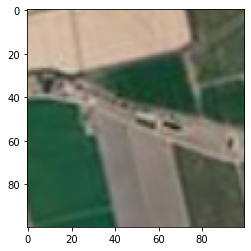

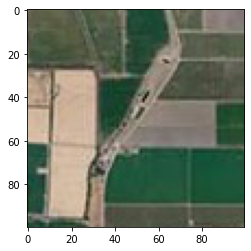

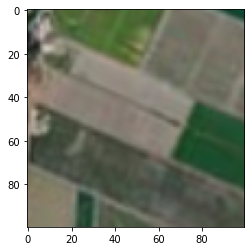

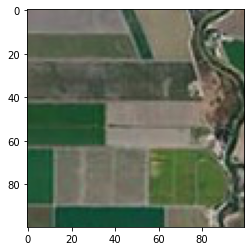

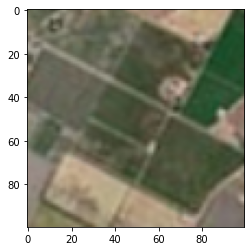

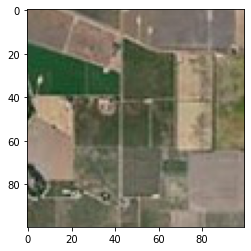

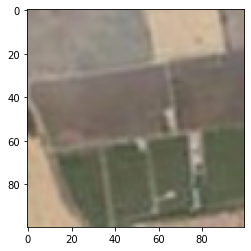

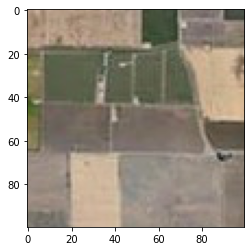

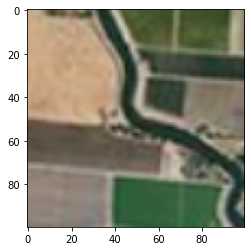

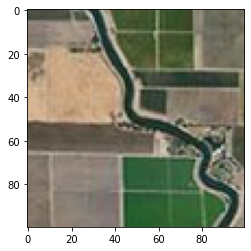

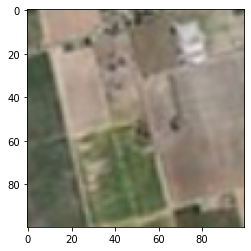

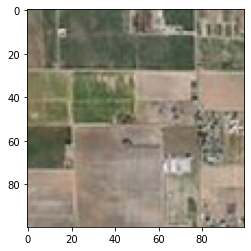

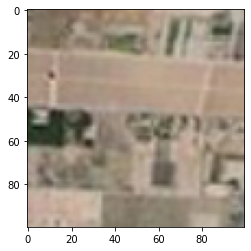

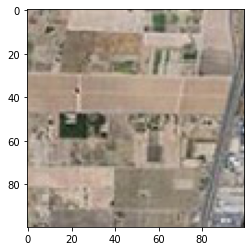

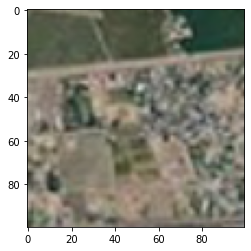

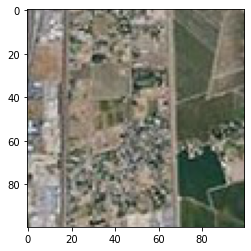

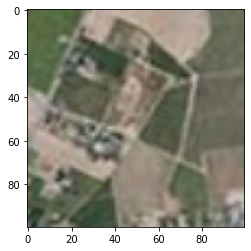

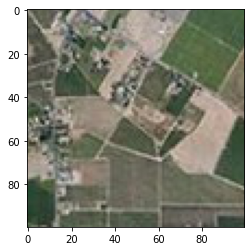

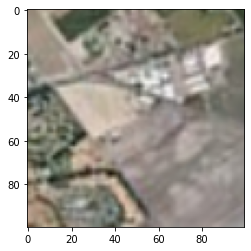

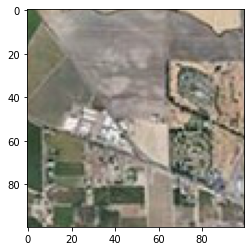

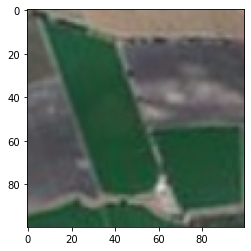

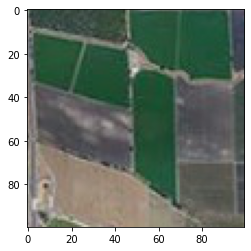

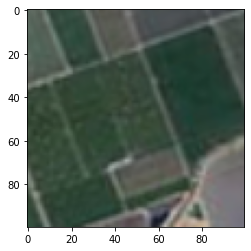

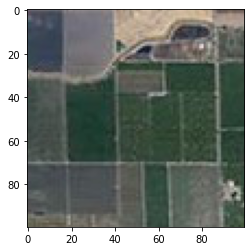

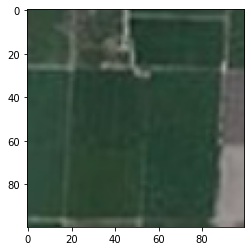

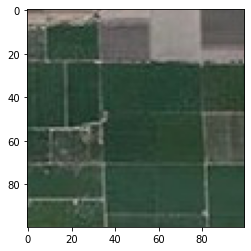

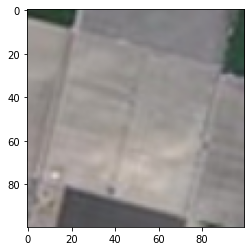

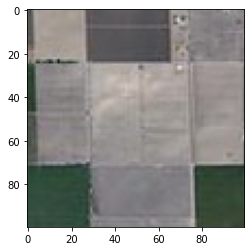

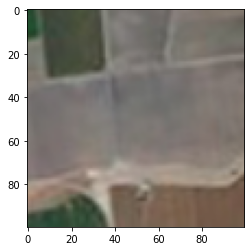

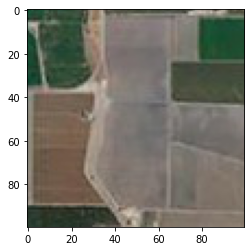

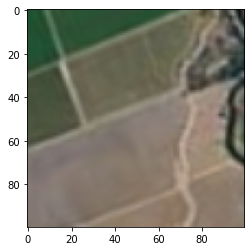

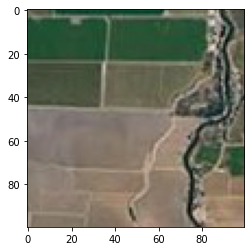

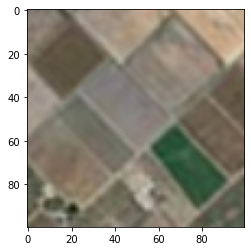

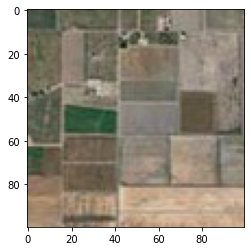

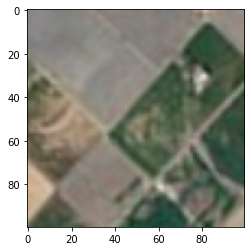

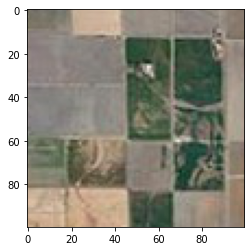

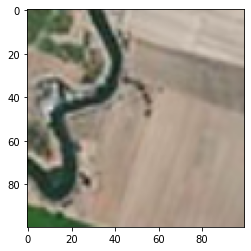

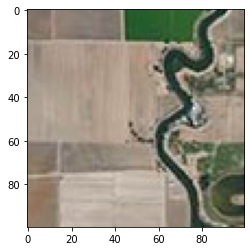

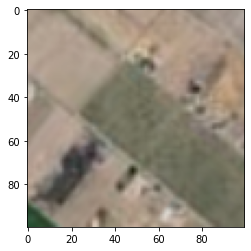

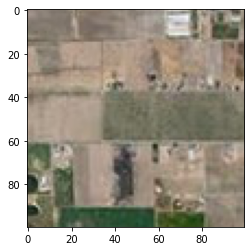

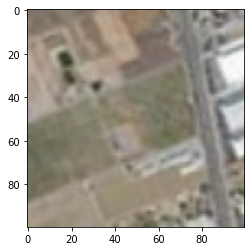

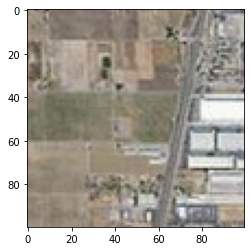

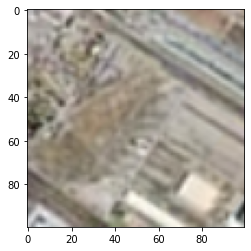

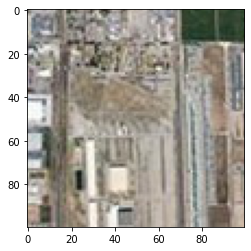

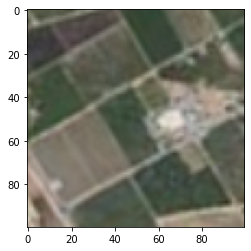

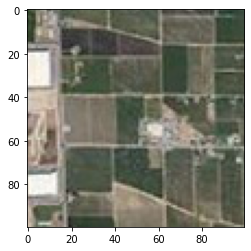

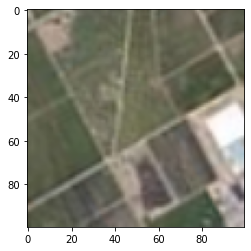

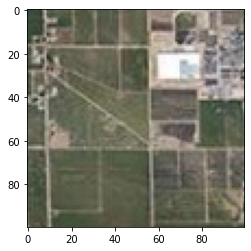

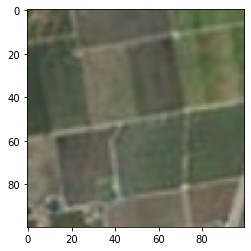

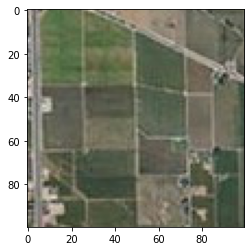

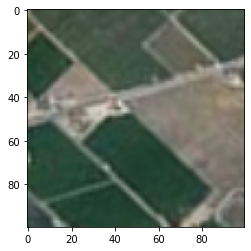

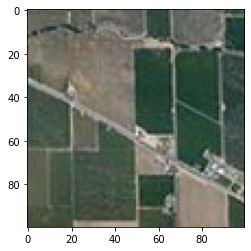

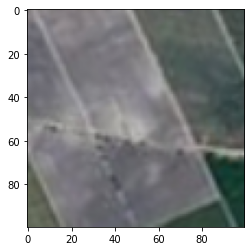

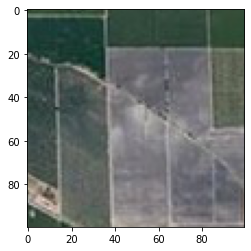

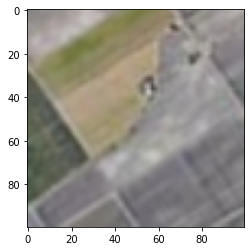

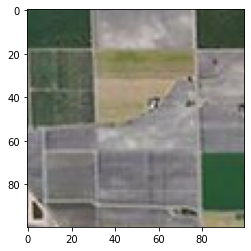

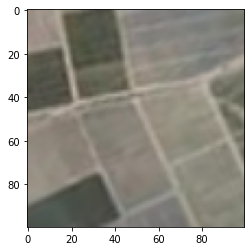

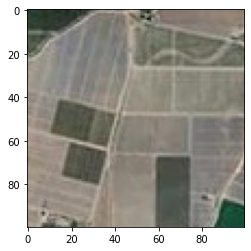

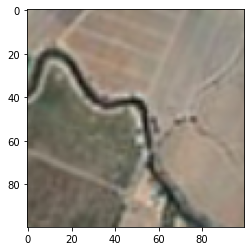

Error in callback <function flush_figures at 0x000001C9305CBAF0> (for post_execute):


KeyboardInterrupt: 

In [191]:
check_no = 100
for i in range(1000):
    check_no = i 
    fig, ax = plt.subplots()
    ax.imshow(img_list[check_no])
    #print(np.shape(img_list[check_no]))
    #print(img)
    #xthing = 0 
    fig, ax = plt.subplots()
    ax.imshow(labels_imgs[check_no])


In [157]:
#make a folder to save imgs to 

In [28]:
#saves each image in the array to that folder
count = 0
for img in img_list:
    count += 1
    counter = str(count)
    np.save(os.path.join(r"C:\Users\g_bab\Downloads\data_wo_rocket_body", 'train_set'+counter), img)

In [ ]:
count = 0
for img_class in labels_imgs:     #true image classes
    count+=1
    countr = str(count)
    np.save(os.path.join(r"C:\Users\g_bab\Downloads\dataCLASSES_wo_rocket_body", 'train_set'+counter), img_class)

In [13]:
#now go to CONVOLUTIONAL NEURAL NET